In [12]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
import random
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import pickle

In [35]:
"""
circ: a QuantumCircuit without measurement at the end yet
name: name you want to save it as
shots: number of shots
"""
def get_circuit_data(circ, name="circuit", shots=10000):
    n = circ.num_qubits
    
    #find statevector/density matrix
    statevector_simulator = Aer.get_backend('statevector_simulator')
    ss_circ = transpile(circ, statevector_simulator)
    sv_result = statevector_simulator.run(ss_circ).result()
    statevector = sv_result.data()['statevector']
    #print(statevector)
    rho = qi.DensityMatrix(statevector)
    
    #add measurement to end of circuit
    circ.measure(range(n),range(n))
    simulator = Aer.get_backend('aer_simulator')
    tcirc = transpile(circ, simulator)
    result = simulator.run(tcirc, shots=shots).result()
    counts = result.get_counts()
    plot_histogram(counts)
    with open(f"data/{name}_counts", "w") as f:
        for count in counts:
            f.write(f"{int(count,2)} {counts[count]}")
            f.write("\n")
    with open(f"data/{name}_density","wb") as file:
        pickle.dump(rho, file)
    print(f"Saved counts and density matrix for {name}")

{'110': 14, '001': 2753, '100': 1583, '101': 1097, '111': 498, '011': 1008, '010': 542, '000': 2505}
saved random_3 counts
saved random_3 density matrix


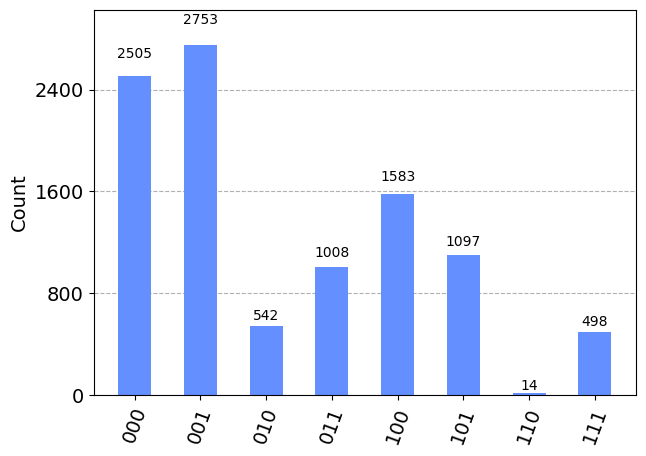

In [39]:
#random circuit
name = "random_3"

n = 3
depth = 20
circ = random_circuit(n,depth,measure=True, seed=1515)
simulator = Aer.get_backend('aer_simulator')
tcirc = transpile(circ, simulator)

result = simulator.run(tcirc, shots=10000).result()
counts = result.get_counts()
print(counts)

with open(f"data/{name}_counts", "w") as f:
    for count in counts:
        f.write(f"{int(count,2)} {counts[count]}")
        f.write("\n")
print(f"saved {name} counts")
circ = random_circuit(n,depth,measure=False, seed=1515)
statevector_simulator = Aer.get_backend('statevector_simulator')
ss_circ = transpile(circ, statevector_simulator)
result = statevector_simulator.run(ss_circ).result()
statevector = result.data()['statevector']
rho = qi.DensityMatrix(statevector)
rho.draw('latex')
with open(f"data/{name}_density","wb") as file:
        pickle.dump(rho, file)
print(f"saved {name} density matrix")
plot_histogram(counts)

Saved counts and density matrix for GHZ_2


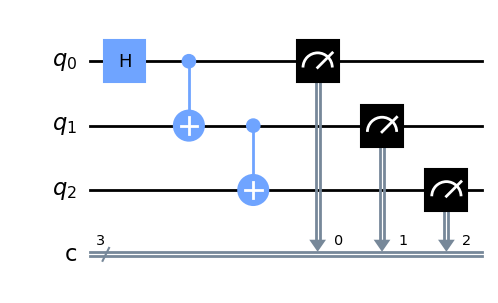

In [38]:
name = "GHZ_2"
n = 3
circ = QuantumCircuit(n,n)
circ.h(0)
circ.cx(0,1)
circ.cx(1,2)
get_circuit_data(circ, name)
circ.draw('mpl')